# 035

Named after this: https://www.youtube.com/watch?v=hgZFuq2S15A
        
This code is designed to mimic the way the retina works in identifying parts of images, etc. 

The code is designed entirely to respond to MNIST sized data in order to get the respective neurons working,
it is not designed to learn from this data (at least at this point). MNIST data seemed an appropriate level
of complexity and size to get a small number of neurons working together.

### Setup the environment

In [75]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Create a sample image to work with

TODO: Flesh this out into a data pipeline later

In [76]:
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

def get_next_image(index=0):
    return images[index]
    

* Get an image from the training set

In [77]:
image = get_next_image(index=0)
print(mndata.display(image))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


* Convert to a numpy array so we can process it easier / better

In [81]:
image=np.asarray(image).reshape((28,28))
print(image)
print(image.shape)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     3.   18.   18.   18.  126.  136.  175.   26.  

### Convolve the image...

* Step across the image, creating a series of mini-matrices that can be used to feed into the retinal neurons

In [82]:
stride = (4,2)   # This will be 5 on-centre neurons, 2 surround (off-centre) neurons
stride_size = stride[0] + stride[1]
len_x, len_y = image.shape
#x_max = int((len_x - stride_size)/stride[0])+1
#y_max = int((len_y - stride_size)/stride[0])+1
x_max = int(len_x/stride[0])
y_max = int(len_y/stride[0])
print ('Convolution Dimensions: x={} / y={}, starting at x={}, y={}'.format(x_max, y_max, x_count, y_count))

Convolution Dimensions: x=7 / y=7, starting at x=8, y=8


* Normalise the image

In [83]:
image_norm = (image * 255.0/image.max()) / 255.
print(image_norm)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

Rendering kernel 0/0 at plot 1/1/1
Rendering kernel 4/0 at plot 2/1/2
Rendering kernel 8/0 at plot 3/1/3
Rendering kernel 12/0 at plot 4/1/4
Rendering kernel 16/0 at plot 5/1/5
Rendering kernel 20/0 at plot 6/1/6
Rendering kernel 24/0 at plot 7/1/7
Rendering kernel 0/4 at plot 1/2/8
Rendering kernel 4/4 at plot 2/2/9
Rendering kernel 8/4 at plot 3/2/10
Rendering kernel 12/4 at plot 4/2/11
Rendering kernel 16/4 at plot 5/2/12
Rendering kernel 20/4 at plot 6/2/13
Rendering kernel 24/4 at plot 7/2/14
Rendering kernel 0/8 at plot 1/3/15
Rendering kernel 4/8 at plot 2/3/16
Rendering kernel 8/8 at plot 3/3/17
Rendering kernel 12/8 at plot 4/3/18
Rendering kernel 16/8 at plot 5/3/19
Rendering kernel 20/8 at plot 6/3/20
Rendering kernel 24/8 at plot 7/3/21
Rendering kernel 0/12 at plot 1/4/22
Rendering kernel 4/12 at plot 2/4/23
Rendering kernel 8/12 at plot 3/4/24
Rendering kernel 12/12 at plot 4/4/25
Rendering kernel 16/12 at plot 5/4/26
Rendering kernel 20/12 at plot 6/4/27
Rendering kernel

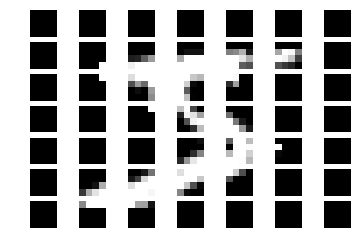

In [92]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))
x_count, y_count = 1, 1

#for y in range (0, len_y - stride_size, stride[0]):
for y in range (0, len_y, stride[0]):
    x_count = 1
    #for x in range(0, len_x - stride_size, stride[0]):
    for x in range(0, len_x, stride[0]):
        print ('Rendering kernel {}/{} at plot {}/{}/{}'.format(x, y, x_count, y_count, (y_count-1)*x_max+x_count))

        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image_norm[y:y_end, x:x_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, (y_count-1)*x_max+x_count)
        a.axis('off')
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    

### Create a basic neuron

Use LIF neuron for now, this can be made more complex over time.

Also this code can be moved out to a seperate function too!!

Based on http://neurdon.wpengine.com/2011/01/19/neural-modeling-with-python-part-1/

In [85]:
# Simulation config (may not all be needed!!)
T        = 50          # total time to sumulate (msec)
dt       = 0.125       # simulation time step
time     = np.arange(0, T+dt, dt) # Time array
t_rest   = 0           # initial refractory time

In [86]:
#LIF Properties 
Vm       = np.zeros(len(time)) # potential (V) trace over time
Rm       = 1                # Resistance (kOhm)
Cm       = 10               # Capacitance (uF)
tau_m    = Rm * Cm          # Time constant
tau_ref  = 4                # refractory period (ms)
Vth      = 1                # spike threshold
V_spike  = 0.5              # spike delta (V)

* Function to create spikes for this neuron

Need to pass in the current / pixel brightness here!!

In [87]:
class Neuron():
    def __init__(self):
        # Simulation config (may not all be needed!!)
        self.T        = 50          # total time to sumulate (msec)
        self.dt       = 0.125       # simulation time step
        self.time     = np.arange(0, T+dt, dt) # Time array
        self.t_rest   = 0           # initial refractory time
        
        #LIF Properties 
        self.Vm       = np.zeros(len(time)) # potential (V) trace over time
        self.Rm       = 1                # Resistance (kOhm)
        self.Cm       = 10               # Capacitance (uF)
        self.tau_m    = Rm * Cm          # Time constant
        self.tau_ref  = 4                # refractory period (ms)
        self.Vth      = 0.75             # = 1  #spike threshold
        self.V_spike  = 0.5              # spike delta (V)
    
    def spike_generator(self, input):
        for i,t in enumerate(self.time):
            if t > self.t_rest:
                self.Vm[i] = self.Vm[i-1] + (-self.Vm[i-1] + input*self.Rm) / self.tau_m * self.dt
                if self.Vm[i] >= self.Vth:
                    self.Vm[i] += self.V_spike
                    self.t_rest = t + self.tau_ref
        return self.time, self.Vm

### Create a retinal unit

Each retinal unit contains

* On-centre cells
* Off-centre / surround cells
* Horizontal cells
* Ganglion cells

Now let's create a function for each type of cell...


* On-center cell

In [88]:
#def on_center_cell(value):

#on_center_cell = Neuron()
#time, Vm = on_center_cell.spike_generator(0)

#print(Vm)


In [89]:
def plot_spikes(time, Vm, x, y):
    plt.plot(time,Vm)
    plt.title('Leaky Integrate and Fire @ {}/{}'.format(x,y))
    plt.ylabel('Membrane potential (V)')
    plt.xlabel('Time (msec)')
    plt.ylim([0,2])
    plt.show()

In [90]:
start_x = 5
start_y = 5

Input at 5/5 = 0.0


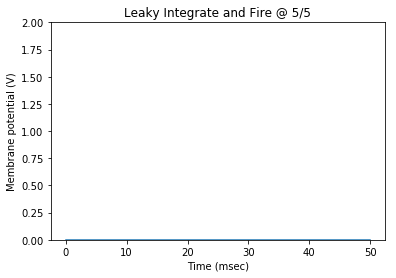

Input at 5/6 = 0.0


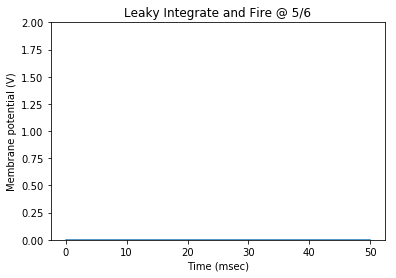

Input at 5/7 = 0.0


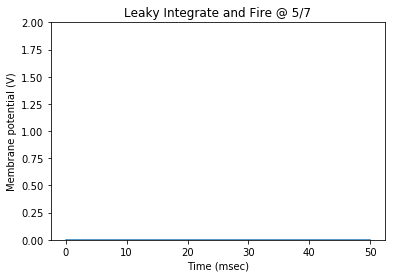

Input at 5/8 = 0.0


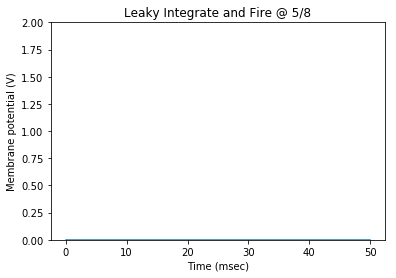

Input at 5/9 = 0.0


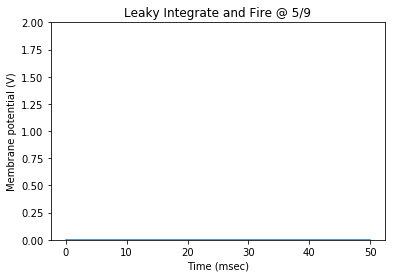

Input at 5/10 = 0.0


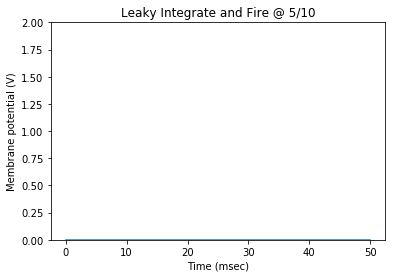

Input at 6/5 = 0.0


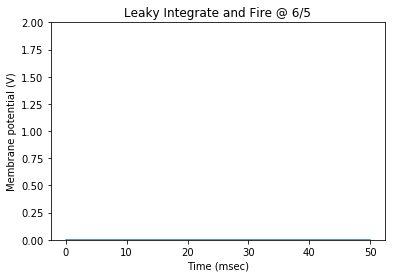

Input at 6/6 = 0.0


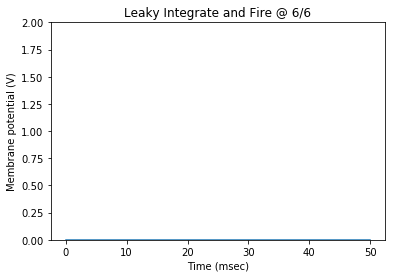

Input at 6/7 = 0.0


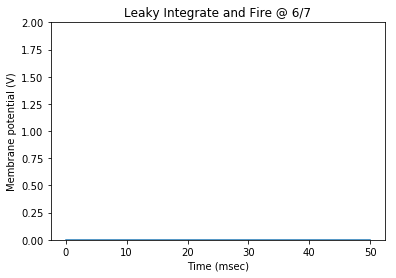

Input at 6/8 = 0.0


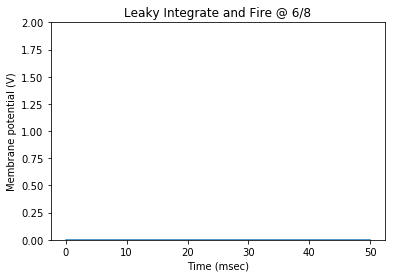

Input at 6/9 = 0.0


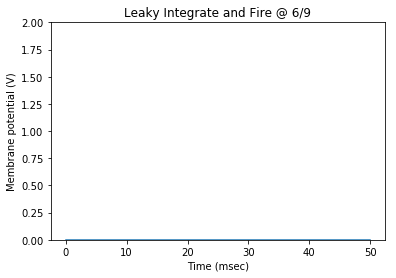

Input at 6/10 = 0.0


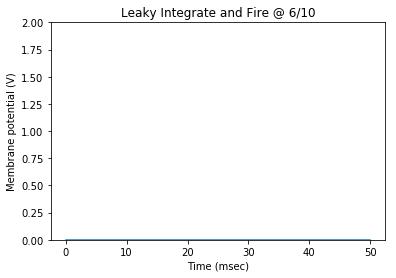

Input at 7/5 = 0.0


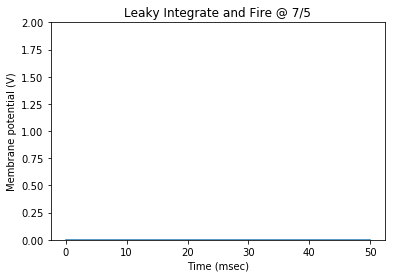

Input at 7/6 = 0.0


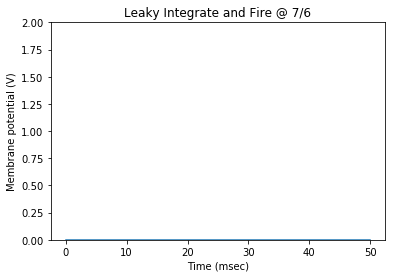

Input at 7/7 = 0.19215686274509805


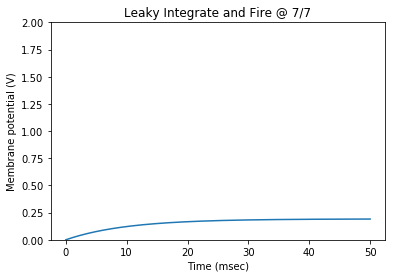

Input at 7/8 = 0.07058823529411765


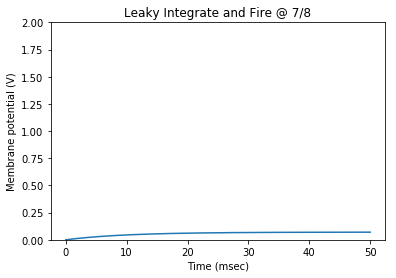

Input at 7/9 = 0.0


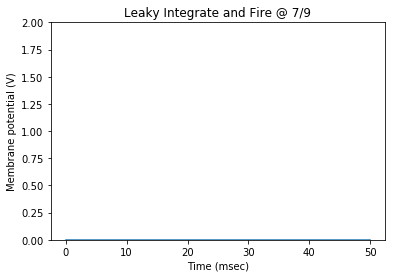

Input at 7/10 = 0.0


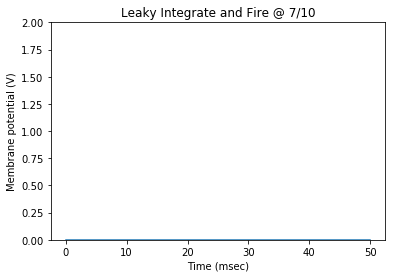

Input at 8/5 = 0.0


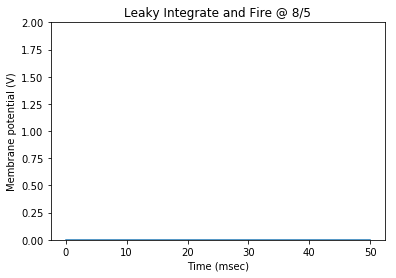

Input at 8/6 = 0.11764705882352941


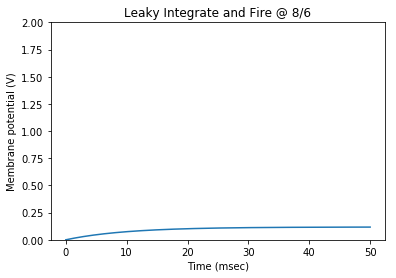

Input at 8/7 = 0.9333333333333333


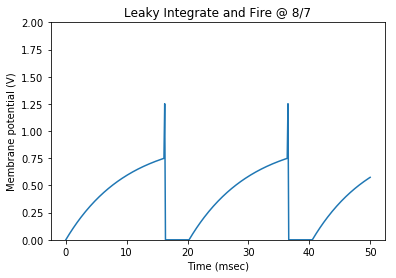

Input at 8/8 = 0.8588235294117647


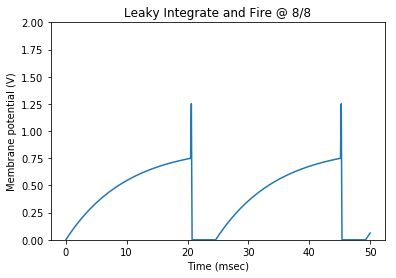

Input at 8/9 = 0.3137254901960784


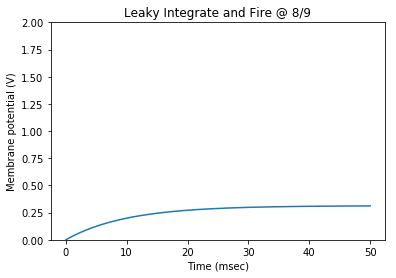

Input at 8/10 = 0.0


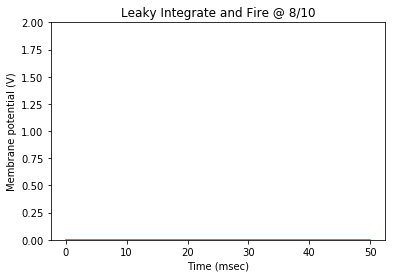

Input at 9/5 = 0.0


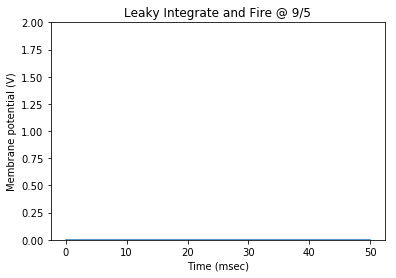

Input at 9/6 = 0.1411764705882353


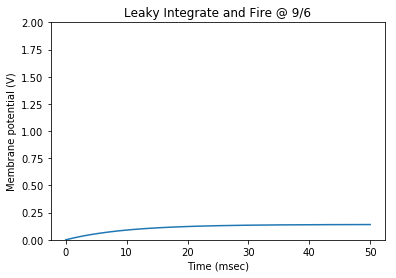

Input at 9/7 = 0.9921568627450981


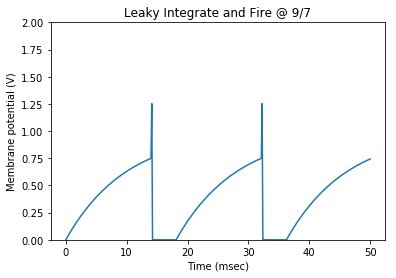

Input at 9/8 = 0.9921568627450981


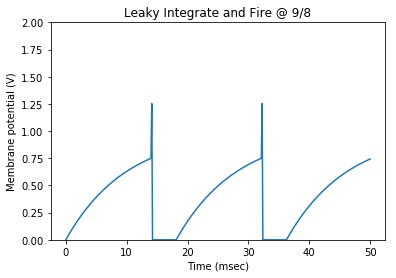

Input at 9/9 = 0.611764705882353


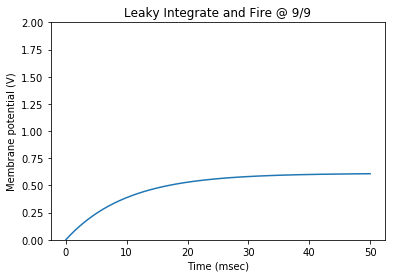

Input at 9/10 = 0.054901960784313725


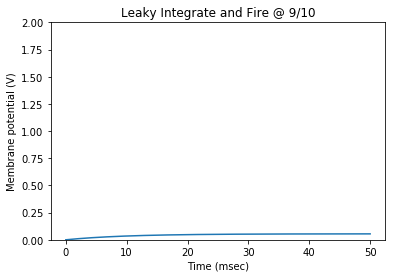

Input at 10/5 = 0.0


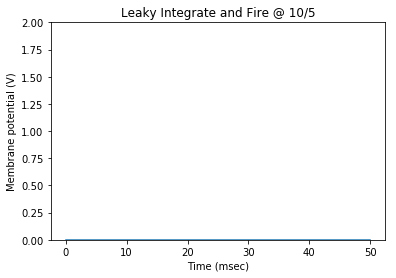

Input at 10/6 = 0.3686274509803922


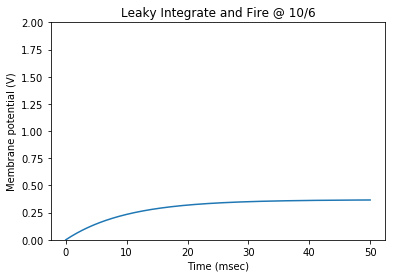

Input at 10/7 = 0.9921568627450981


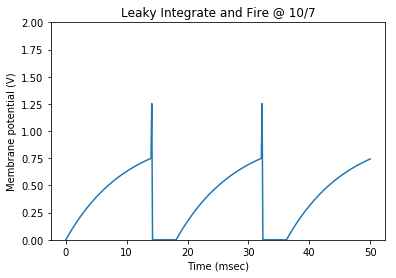

Input at 10/8 = 0.9921568627450981


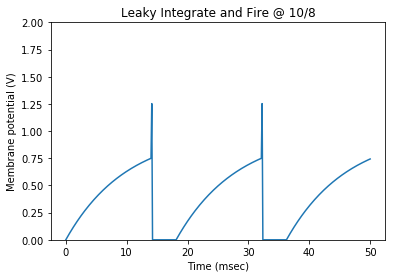

Input at 10/9 = 0.4196078431372549


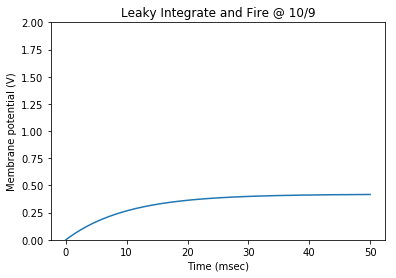

Input at 10/10 = 0.00392156862745098


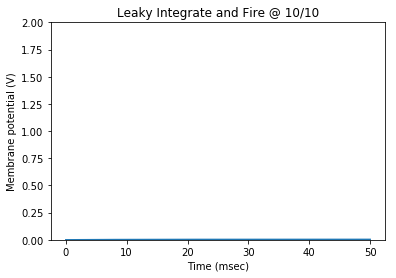

In [94]:
for x in range(start_x, start_x + stride_size, 1):
    for y in range(start_y, start_y + stride_size, 1):
        input = image_norm[y,x]
        print ('Input at {}/{} = {}'.format(x,y,input))
        on_center_cell = Neuron()
        time, Vm = on_center_cell.spike_generator(input)
        plot_spikes(time, Vm, x, y)
        